In [4]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sb 
from pandas import Series,DataFrame
from numpy.random import randn 
from matplotlib import rcParams 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

get_ipython().run_line_magic('matplotlib', 'inline')
rcParams['figure.figsize']=10,10
sb.set_style('whitegrid')
warnings.filterwarnings("ignore")

np.random.seed(0)

add = 'C:\AppleStore.csv'
data = pd.read_csv(add)

In [5]:
data.head()

,sr.no.,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang_num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [12]:
data = data.drop(['currency'],axis=1)

In [13]:
data.head()

,sr.no.,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang_num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [15]:
data['cont_rating'] = pd.factorize(data['cont_rating'])[0]
data['prime_genre'] = pd.factorize(data['prime_genre'])[0]
data.head()

,sr.no.,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang_num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,0,0,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,0,1,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,0,2,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,1,3,37,5,9,1
4,5,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,0,4,37,5,45,1


In [16]:
data = data.drop(['track_name'],axis=1)

In [17]:
data.head()

,sr.no.,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang_num,vpp_lic
0,1,281656475,100788224,3.99,21292,26,4.0,4.5,6.3.5,0,0,38,5,10,1
1,2,281796108,158578688,0.00,161065,26,4.0,3.5,8.2.2,0,1,37,5,23,1
2,3,281940292,100524032,0.00,188583,2822,3.5,4.5,5.0.0,0,2,37,5,3,1
3,4,282614216,128512000,0.00,262241,649,4.0,4.5,5.10.0,1,3,37,5,9,1
4,5,282935706,92774400,0.00,985920,5320,4.5,5.0,7.5.1,0,4,37,5,45,1


In [69]:

data = data.drop(['label'],axis=1)

In [70]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std

array([[-1.53813079, -2.1439385 , -0.27380615, ...,  0.65105067,
         0.57647077,  0.08364175],
       [-1.53780753, -2.14342366, -0.11291148, ...,  0.65105067,
         2.21808338,  0.08364175],
       [-1.53748426, -2.14289205, -0.27454169, ...,  0.65105067,
        -0.30747447,  0.08364175],
       ...,
       [ 2.04561627,  1.19700256, -0.24447871, ..., -1.36318325,
        -0.56003026,  0.08364175],
       [ 2.0462628 ,  1.19722098, -0.283696  , ..., -1.86674173,
        -0.43375237,  0.08364175],
       [ 2.04884894,  1.19920077, -0.30134036, ..., -1.86674173,
        -0.43375237,  0.08364175]])

In [71]:
clt = KMeans(n_clusters=10, random_state=0, n_jobs=-1)

In [72]:
model = clt.fit(data_std)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [79]:
clust_labels = model.predict(data_std)
clust_labels

array([0, 6, 0, ..., 1, 2, 2])

In [80]:
centers = model.cluster_centers_

In [81]:
centers

array([[-1.01410221e+00, -1.13933111e+00, -1.73617705e-01,
         6.72394163e-02,  8.04095631e-02,  2.27912364e-03,
         3.78268150e-01,  2.63674353e-01, -3.53194458e-01,
         2.89116777e-01,  2.29202126e-01,  5.20980212e-01,
        -7.47690145e-02,  8.36417501e-02],
       [ 6.08208028e-01,  5.78790902e-01, -2.70669159e-01,
        -1.45959122e-01, -1.69790023e-01, -1.16673973e-01,
        -2.09548873e+00, -1.71286151e+00,  8.85363371e-02,
         2.36589409e-01,  2.03946967e-01, -5.75663223e-01,
        -4.09185146e-01,  8.36417501e-02],
       [ 7.02786092e-01,  7.29635303e-01, -1.33933992e-01,
        -1.03224487e-01, -1.20401642e-01, -1.83666397e-02,
         4.19142481e-01,  4.00229055e-01, -4.68006089e-01,
        -3.75481288e-01,  2.11195610e-01,  4.08695027e-01,
        -1.88710238e-01,  8.36417501e-02],
       [-5.67551118e-01, -5.81433653e-01, -3.28195363e-01,
        -9.94527981e-02, -5.87021266e-02, -5.20645724e-02,
         2.32899118e-01, -2.92958654e-02, -1.

In [82]:
data['label'] = clust_labels

In [83]:
data.head()

,sr.no.,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang_num,vpp_lic,label
0,1,281656475,100788224,3.99,21292,26,4.0,4.5,0,0,38,5,10,1,0
1,2,281796108,158578688,0.00,161065,26,4.0,3.5,0,1,37,5,23,1,6
2,3,281940292,100524032,0.00,188583,2822,3.5,4.5,0,2,37,5,3,1,0
3,4,282614216,128512000,0.00,262241,649,4.0,4.5,1,3,37,5,9,1,0
4,5,282935706,92774400,0.00,985920,5320,4.5,5.0,0,4,37,5,45,1,8


In [84]:
set(data['label'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [85]:
model.labels_

array([0, 6, 0, ..., 1, 2, 2])

In [122]:
rcParams['figure.figsize']=20,20

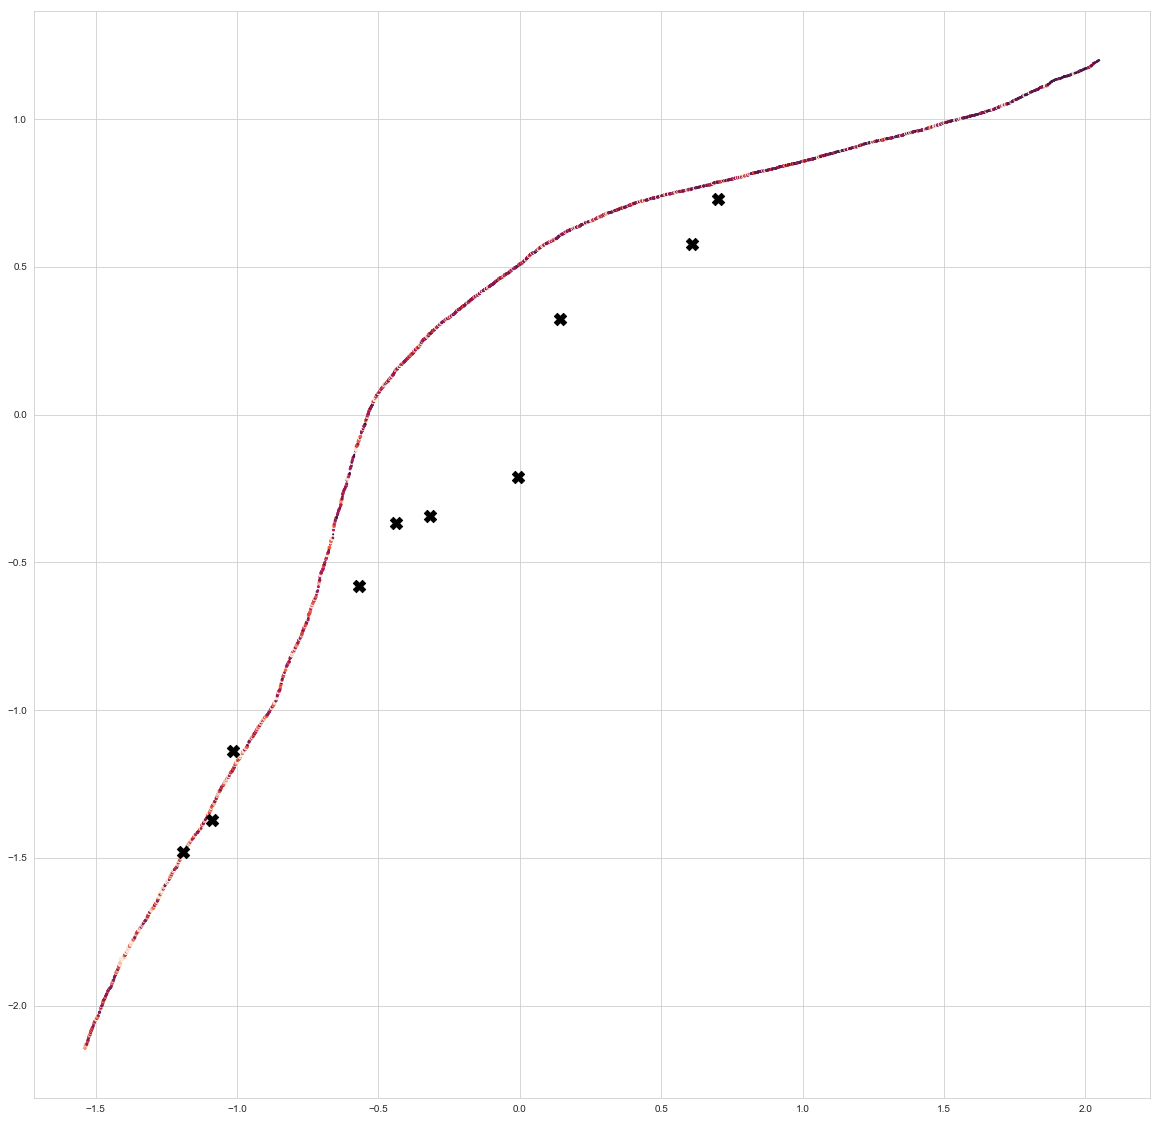

In [125]:

plt.scatter(data_std[: ,0],data_std[: ,1],s=model.labels_,c=model.labels_)
plt.scatter(centers[: ,0],centers[: ,1],s=150,c='black',marker='X')
 